# Data Analysis Interview Challenge

## Part 1 - Exploratory Data Analysis 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
df.describe()

<ipython-input-4-ea8415b8a3ee>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,login_time
count,93142
unique,92265
top,1970-04-04 01:17:40
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


#### Aggregating login counts based on 15 minute time intervals

In [3]:
df.sort_values(by = 'login_time', inplace = True)
df['count'] = 1
df.head()

,login_time,count
6,1970-01-01 20:12:16,1
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
3,1970-01-01 20:16:36,1
2,1970-01-01 20:16:37,1


In [4]:
#Using pd.Grouper to aggregate the login counts by 15min intervals
df_agg = df.groupby([pd.Grouper(key='login_time', freq='15Min')]).sum().reset_index()

In [7]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  9788 non-null   datetime64[ns]
 1   count       9788 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 153.1 KB


In [5]:
df_agg.set_index('login_time', inplace = True)
df_agg.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [19]:
df_agg.tail()

,count
login_time,
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2
1970-04-13 18:30:00,7
1970-04-13 18:45:00,6


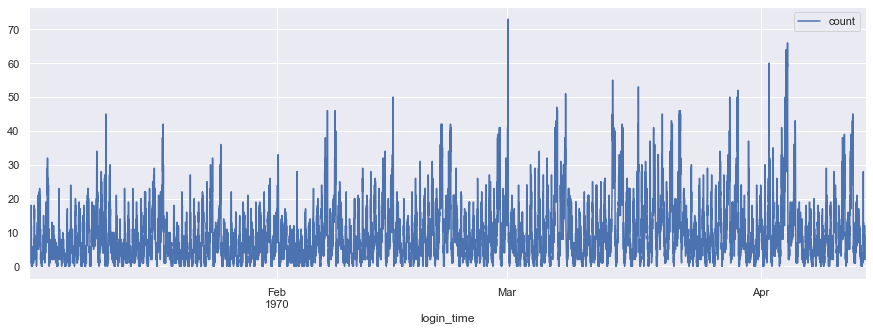

In [21]:
_ = df_agg.plot(figsize = (15,5))


There seems to be regularity to the peaks and valley. We can look at a week and a single day to get a better understanding of the cycles in the data 

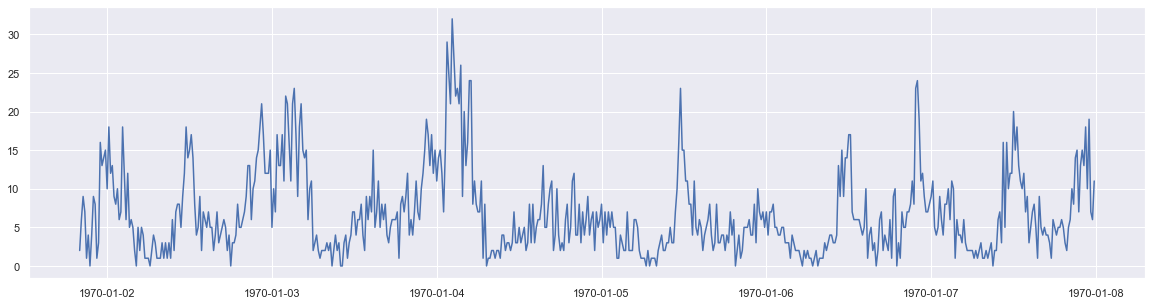

In [36]:
plt.figure(figsize = (20,5))
plt.plot(df_agg.loc['1970-01-01': '1970-01-07'])

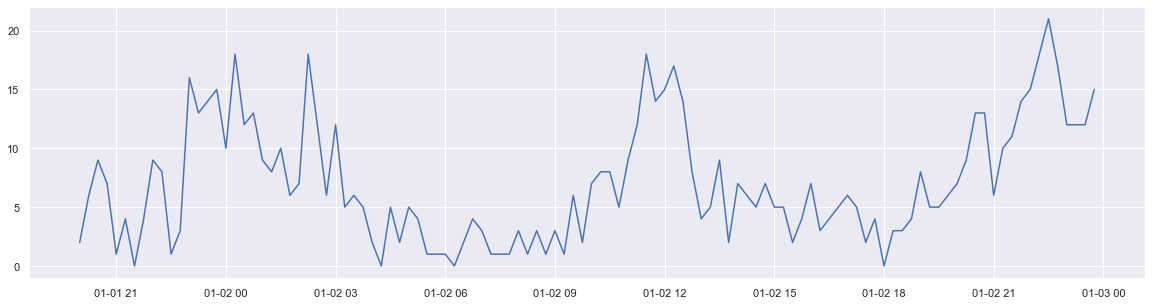

In [42]:
plt.figure(figsize = (20,5))
plt.plot(df_agg.loc['1970-01-01': '1970-01-02'])

It seems that the activity peaks every 12 hours

In [6]:
df_copy = df_agg.copy()

In [7]:
df_copy['DayOfWeek'] = df_copy.index.weekday

In [8]:
df_copy.sort_values(by = 'count', ascending = False, inplace = True)
df_copy.head(10)

,count,DayOfWeek
login_time,,
1970-03-01 04:30:00,73,6
1970-04-04 05:30:00,66,5
1970-04-04 01:30:00,64,5
1970-04-04 01:15:00,63,5
1970-04-01 23:30:00,60,2
1970-04-04 05:00:00,60,5
1970-04-04 04:45:00,59,5
1970-04-04 05:15:00,59,5
1970-04-04 01:45:00,56,5


It can be seen that the peeks are usually near the weekends

#### Conclusion

Two trends can be observed from the data. The first is that it looks like that the activity peaks every 12 hours. Second one is that it can be observed that the activity builds over the week, peaking at weekend. This trend holds true for most of the data. One data quality issue is that the login times are random and not sorted, but that issue is easy to fix.

## Part 2 - Experiment and Metric Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs. 

**1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?**

Ans. I would choose to look at the engagement of the drivers in the city during the weekends other than the primary city during the weekday. It is very unlikely for the drivers to take advantage of the reimbursement of the toll during the weekdays as both the cities have peak activity at completely opposite times of day. So, for the drivers it would mean to be working more than 12 hours a day. However, the weekends are active in both cities during the day and and night. So, it would be more reasonable for the driver to take the customers to and from the two cities and get reimbursement for all their toll costs. So, __increase in the number of rides across cities__ can be one metric. If the goal is to increase the revenue by promoting the cross-city rides, the experiment will be successful if the number of rides across the cities increases. Another can be __increase in the number of tolls being paid__. If there is an increase in the number of tolls being paid by the drivers, then it means that the experimant is a success.

**2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:**

__*a) how you will implement the experiment*__
    
I will implement an A/B test. In this experiment there will be 2 groups, A Treatment group and a Control group. The treatment group will be given the reimbursement of their toll costs for some time and so their pattern will be observed compared to the control group. 
    
__*b) what statistical test(s) you will conduct to verify the significance of the observation*__


After the ride data is available of the two groups, we will use inferential statistics to compare the data. It will be used to find the difference in the measures i.e. rides/total cross-city rides, number of tolls paid by drivers between the Treatment and the Control group. We will use that to determine whether the observed difference is statistically significant or by random chance. I would use a t-test to compare the number of trips by drivers back and forth between the cities and to find if reimbursing tolls lead to an increase in driver partners who provide rides across the cities.

__*c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.*__

With testing the two groups, there are 2 possibilities. First, there is no difference between the two groups, meaning there is reasonable probability that the difference obsereved is by chance. This is also known as the Null Hypothesis. Second, there is real difference between the two groups, meaning the observed differnce between all of the measures of two groups is significant and cannot be explained by random chance. If the difference is significant, I will recommend to the city opertaions team to make the policy permanent. One caveat is the validity of data as the experiment is done by considering that there are no other variables. But if there are other variables involved, our model will not perform well.

# Part 3 - Predictive Modeling

In [3]:
df1 = pd.read_json('ultimate_data_challenge.json')
df1.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
# Converting the signup_date and last_trip_date columns to datetime
df1['signup_date'] = pd.to_datetime(df1['signup_date'])
df1['last_trip_date'] = pd.to_datetime(df1['last_trip_date'])


In [5]:
# Calculating 30 days delta
thirty_day_delta = pd.Timedelta('30 days')
thirty_day_delta

Timedelta('30 days 00:00:00')

In [6]:
# Checking if the user is active. 
#If the user's last trip is less than 30 days from the end date, then the user is not active

end_date = max(df1.last_trip_date)
df1['active']= end_date - df1.last_trip_date <= thirty_day_delta
df1.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [7]:
df1['active'].value_counts()

False    31196
True     18804
Name: active, dtype: int64

In [8]:
# Percentage of users retained
18804/50000*100

37.608000000000004

In [9]:
df1.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
active                       0
dtype: int64

In [10]:
df1.dropna(subset=['phone'], inplace = True)

In [14]:
df1.avg_rating_of_driver.fillna(df1.avg_rating_of_driver.mean(), inplace = True)
df1.avg_rating_by_driver.fillna(df1.avg_rating_by_driver.mean(), inplace = True)

In [16]:
df1.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
active                    0
dtype: int64

#### Distribution of Average Trip Distance and Number of Trips in first 30 days

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_dist', ylabel='Density'>

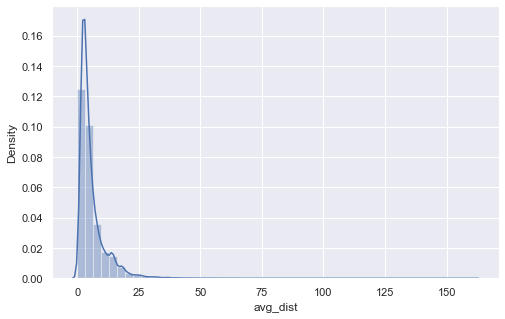

In [23]:
plt.figure(figsize = (8,5))
sns.distplot(df1['avg_dist'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trips_in_first_30_days', ylabel='Density'>

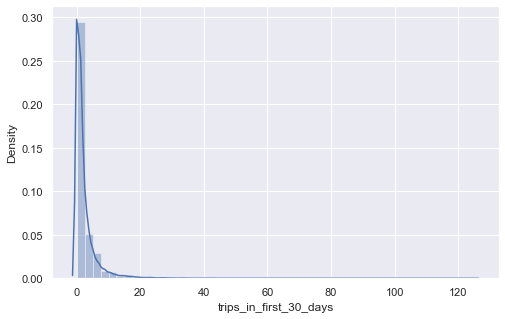

In [28]:
plt.figure(figsize = (8,5))
sns.distplot(df1['trips_in_first_30_days'])

Above plots show the distribution of the average trip distance and the number of trips taken in the first 30 days. The distribution is skewed with most of the users taking less than 20 trips.

#### Distribution of Average Trip Distance and Number of Trips in first 30 days

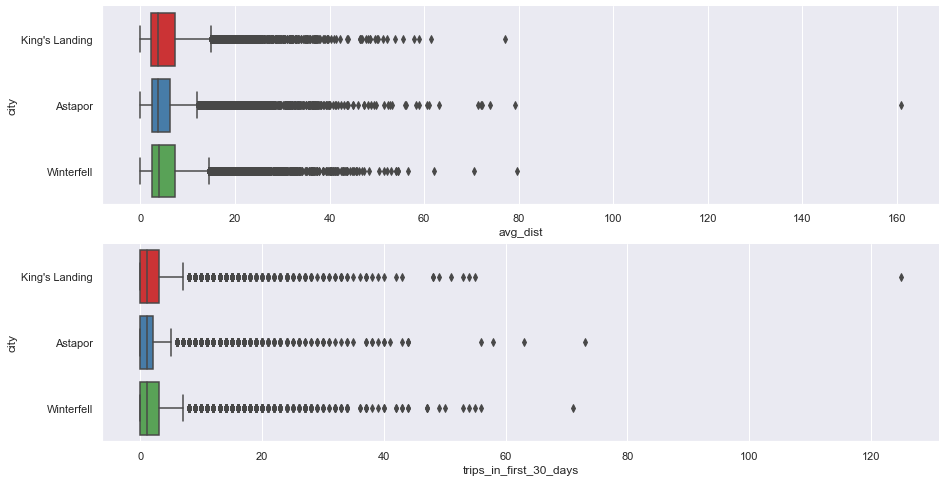

In [29]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(15,8))
ax1,ax2 = ax.flatten()
ax = sns.boxplot(y ='city', x = 'avg_dist', data = df1, palette = 'Set1', ax = ax1)
ax = sns.boxplot(y ='city', x = 'trips_in_first_30_days', data = df1, palette ='Set1', ax = ax2)
sns.despine()

The above plots show the distribution of the number of trips taken in the first 30 days and average distance of the trip per city. It can be seen that there are less rides taken in Astapor than  in King's Landing and Winterfell.

#### Creating dummies

The dataset has low dimensionality. So,  we do not need to reduce it using PCA or some other technique. We will get dummy variables of the categorical features using get_dummies

In [17]:
#create dummy variables for categorical features
df_feat = pd.get_dummies(df1, columns = ['city','phone','ultimate_black_user'], drop_first = True)
df_feat.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,True,1,0,1,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,False,0,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,False,0,0,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,True,1,0,1,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,False,0,1,0,0


In [31]:
#set target and dropping columns that are not needed
target = df_feat['active']
df_feat = df_feat.drop(['last_trip_date','signup_date','active'],axis=1)

### Modeling

This is a classification problem. We are trying to classify if the user will be retained after 6 months.

We will use these methods:
Logistic Regression
Random Forest Classifier

The Logistic Regression is a simple classification model that will help establishing the baseline performance.

Random Forest Classifierwill also be used because usually ensemble methods have better performance in these types of classification problems.


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Logistic Regression with gridsearch

In [42]:
#scale data
scaler = QuantileTransformer()
scaled_feat = scaler.fit_transform(df_feat)

In [43]:
#split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(scaled_feat, target, test_size = 0.2, random_state = 42)

In [44]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [45]:
logreg.score(X_test,y_test)

0.7413567180727749

In [46]:
#initialize model
logreg = LogisticRegression(solver='lbfgs')
#set parameter grid
param_grid = {'C':np.arange(0.5,5.1,0.1)}
#instantiate and fit grid search object
grid = GridSearchCV(logreg, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])})

In [63]:
#find coefficients from Logistic Regression
logreg_coef = LogisticRegression(C=grid.best_estimator_.C)
logreg_coef.fit(X_train,y_train)
df_coef = pd.DataFrame(zip(list(df_feat.columns),logreg_coef.coef_[0]),index=range(df_feat.columns.shape[0]),columns=['feature','coefficient'])
df_coef

,feature,coefficient
0,trips_in_first_30_days,0.113486
1,avg_rating_of_driver,-0.329871
2,avg_surge,2.524154
3,surge_pct,-1.444655
4,weekday_pct,-0.242639
5,avg_dist,0.157272
6,avg_rating_by_driver,-1.344866
7,city_King's Landing,1.885203
8,city_Winterfell,0.520991
9,phone_iPhone,1.074034


In [47]:
print(np.mean(cross_val_score(grid, X_test, y_test, cv=5)))

0.7422639046883888


By using the Logistic Regression, we get an accuracy of 75%.

Now we will use RandomForest Classifier and see whethe we can increase the accuracy of our model.

### RandomForest Classifier

In [48]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
rf_clf.score(X_test, y_test)

0.7514363471424251

In [50]:
parameters = {"n_estimators": [5,10,20,40,60],"max_features":['auto','sqrt','log2'],"max_depth":[10,15,20]}
rf_clf = RandomForestClassifier(n_jobs=-1)

In [51]:
rf_grid = GridSearchCV(rf_clf, param_grid = parameters, scoring="accuracy")
rf_grid.fit(X_train, y_train)
print('best estimator:',rf_grid.best_estimator_)
print('best params:',rf_grid.best_params_)
print('best score:',rf_grid.best_score_)

best estimator: RandomForestClassifier(max_depth=10, n_estimators=60, n_jobs=-1)
best params: {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 60}
best score: 0.7829800524645698


In [54]:
rf_clf_1 = rf_grid.best_estimator_

In [55]:
rf_clf_1.score(X_test, y_test)

0.7824816046769479

In [56]:
df_imp = pd.DataFrame(zip(list(df_feat.columns),rf_clf_1.feature_importances_), index=range(df_feat.columns.shape[0]),columns=['feature','importance'])
df_imp.sort_values(by='importance',ascending=False)

,feature,importance
6,avg_rating_by_driver,0.175288
3,surge_pct,0.164578
7,city_King's Landing,0.134534
4,weekday_pct,0.130220
9,phone_iPhone,0.082889
2,avg_surge,0.078268
10,ultimate_black_user_True,0.063432
0,trips_in_first_30_days,0.062385
5,avg_dist,0.061657
1,avg_rating_of_driver,0.032772


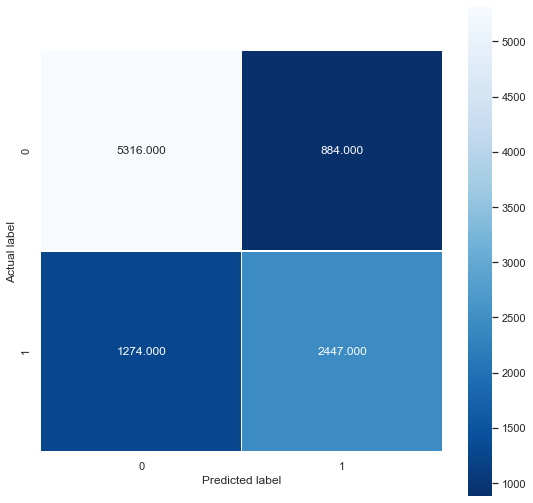

In [62]:
predictions = rf_clf_1.predict(X_test)
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


### Conclusion

Using RandomForest Classifier, we have created a model that gives us 78% accuracy. With Logistic Regression, we get an accuracy of 74%. So by using Random Forest, we have increased our model accuracy.

RF gives us the most important fearures and Logistic Regression shows us the effect of features through the coefficents. Some insights can be obtained for the company. We will look some of the features and draw some insights.

weekday percentage: The chance of being an active user decrease as the percent of the user’s trips occurring during a weekday goes up. So, by encouraging people to use the app on Weekend will be more beneficial for company revenue

average rating by driver: There is a decreased likelihood of being an active user as your rating goes up.

trips in the first 30 days: As the number of trips in the first 30 days increases, so does the chance that a rider is active after 6 months.

By applying these guidelines (encouraging riders to use the app on weekends, take the trip in the first 30 days), the company can increase the number of more active users and increase their revenue.